# Getting started

The following tutorial demonstrates how to use the package to calculate various codon usage bias indices given the coding sequences of genes.

In [1]:
import codonbias as cb

## Load sequences

Loading sequences is only a matter of converting them to a list of Python strings. For example, the following code loads *E. coli* genes from a FASTA file using Biopython. You may use any other package, or any other source for the sequences, as long as they are converted to a list of strings.

In [2]:
from Bio.SeqIO import parse

fasta = parse('Escherichia_coli_str_k_12_substr_mg1655.ASM584v2.cds.all.fa', 'fasta')
genes = [str(record.seq) for record in fasta]

## Initialize a codon bias model

Next, every codon model (also called *score* in the package) is a class that can be initialized with various parameters, or used with its default parameters (see the documentation of each score). For example, here we initialize the Effective Number of Codons (ENC) score. By default, the variant proposed by Sun, Yang & Xia (MBE, 2013) is used.

In [3]:
enc = cb.scores.EffectiveNumberOfCodons()

Alternatively, we could add background-correction to the model, as proposed by (Novembre, MBE 2002).

In [4]:
enc = cb.scores.EffectiveNumberOfCodons(bg_correction=True)

The rest of the models in the `codonbias.scores` module are initialized in a similar way.

## Compute gene scores

Once the model has been initialized, we can provide ENC with the *E. coli* sequences and retrieve a score for each gene.

In [5]:
gene_scores = enc.get_score(genes)

Text(0.5, 1.0, 'background-corrected ENC scores of E. coli genes')

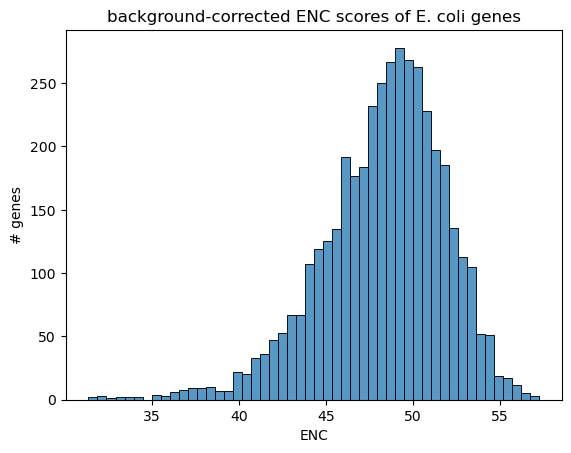

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(gene_scores, bins=50)
plt.xlabel('ENC')
plt.ylabel('# genes')
plt.title('background-corrected ENC scores of E. coli genes')

## Compute positional weights

For many scores, it's possible to calculate a positional score for each codon in the sequence. For example, below is a meta-gene analysis of the first 100 codons of *E. coli* genes using the weights of the Codon Adaptation Index (CAI) model. The model requires a set of reference genes to calculate codon frequencies, and in this case we'll provide the entire set of genes as reference.

In [7]:
cai = cb.scores.CodonAdaptationIndex(ref_seq=genes)

Slicing the genes, as well as padding the resulting vectors to have constant dimesnions, can be done automatically.

In [8]:
gene_vecs = cai.get_vector(genes, slice=slice(3, 300), pad=True)  # skip the START codon
gene_vecs.shape

(4140, 99)

Finally, we can visualize the result and confirm the presence of a "ramp" in the 5'-end of the gene.

Text(0.5, 1.0, 'metagene plot of CAI weights')

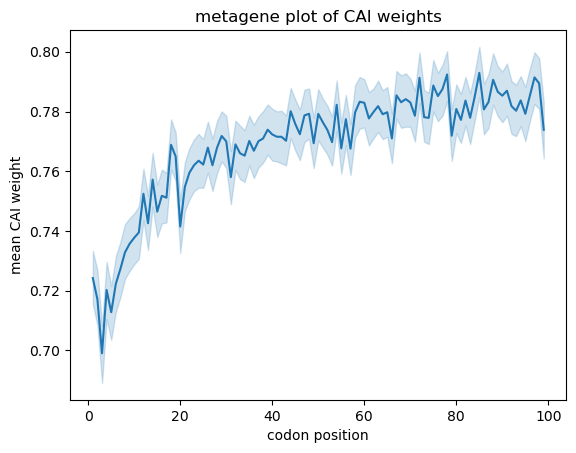

In [9]:
import pandas as pd

plot_df = pd.DataFrame(gene_vecs).melt(var_name='position', value_name='CAI weight')
plot_df['position'] += 1  # skipped the START codon

sns.lineplot(x='position', y='CAI weight', data=plot_df, errorbar=('ci', 95))
plt.xlabel('codon position')
plt.ylabel('mean CAI weight')
plt.title('metagene plot of CAI weights')